In [1]:
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('./train.csv')

In [4]:
data.head

<bound method NDFrame.head of       ClientPeriod  MonthlySpending  ...              PaymentMethod Churn
0               55            19.50  ...               Mailed check     0
1               72            25.85  ...    Credit card (automatic)     0
2                1            75.90  ...           Electronic check     1
3               32            79.30  ...               Mailed check     0
4               60           115.25  ...    Credit card (automatic)     0
...            ...              ...  ...                        ...   ...
5277             3            30.40  ...           Electronic check     0
5278            50            44.45  ...  Bank transfer (automatic)     0
5279             1            55.05  ...               Mailed check     0
5280            29            76.00  ...    Credit card (automatic)     0
5281            19            75.90  ...               Mailed check     0

[5282 rows x 20 columns]>

In [5]:
np.sum(data.isna()) # кол-во NaN-ов в каждом столбце

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
 # Заменяем пустые значения нулем
 data['TotalSpent'] = np.where(data['TotalSpent'] == ' ', 0, data['TotalSpent'])

In [14]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [15]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

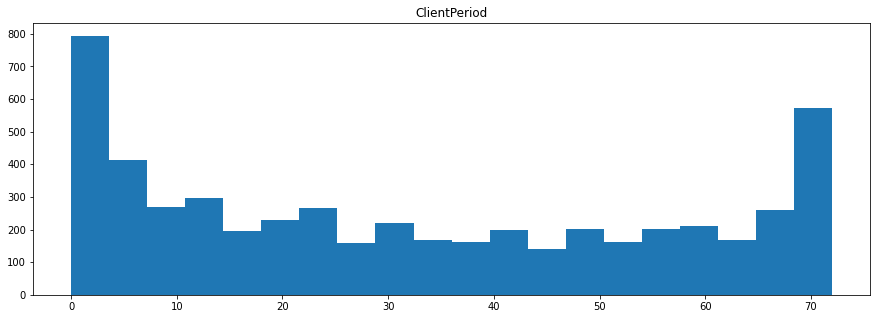

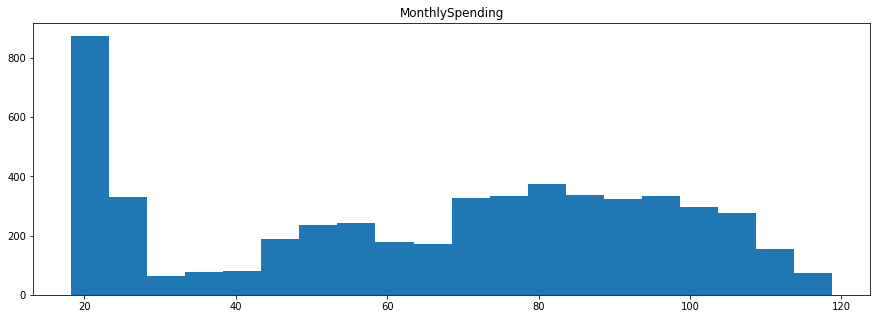

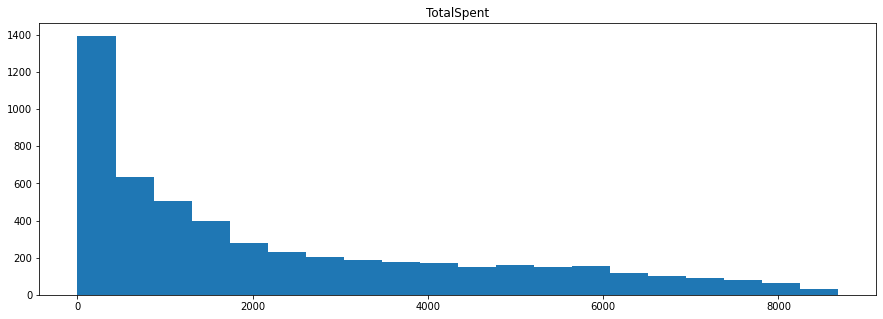

In [16]:
#plt.figure(figsize=(15,8))
#fig, axs = plt.subplots(1, len(num_cols), sharey=True, tight_layout=True)
for i in tqdm(range(len(num_cols))):
    plt.figure(figsize=(15,5))
    plt.title(num_cols[i])
    plt.hist(data[ num_cols[i] ], bins=20)
    plt.show()

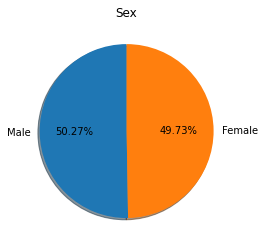

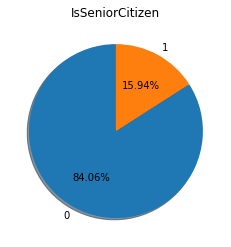

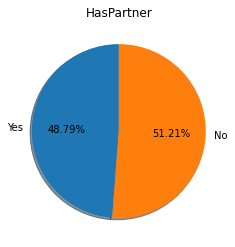

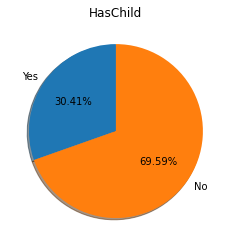

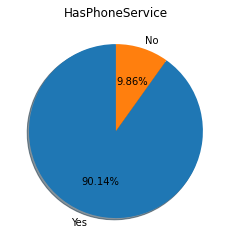

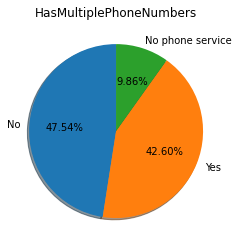

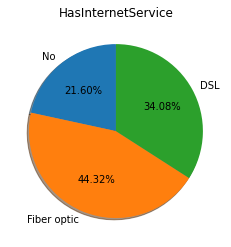

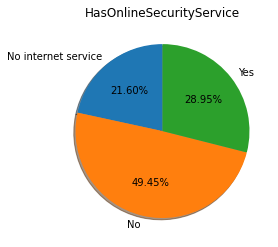

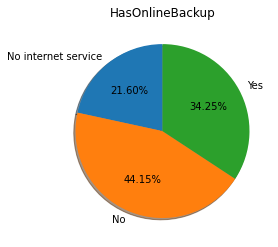

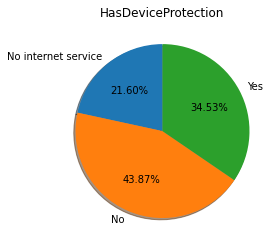

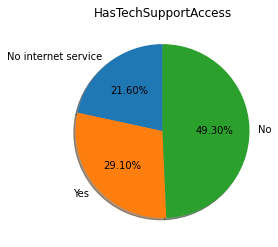

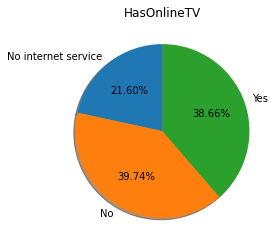

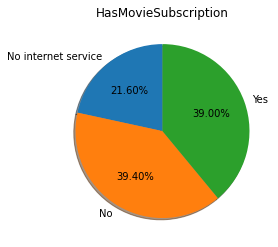

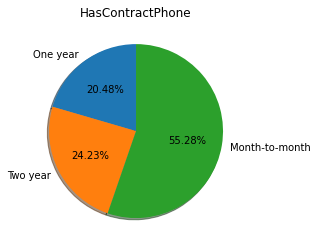

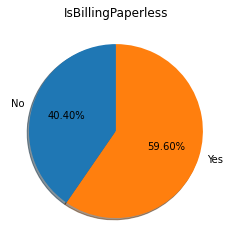

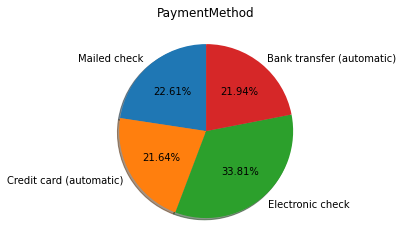

In [17]:
 for i in range(len(cat_cols)):
    labels = data[cat_cols[i]].unique()
    sizes = [np.sum(data[cat_cols[i]] == labels[j]) for j in range(len(labels))]

    plt.title(cat_cols[i])
    plt.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    plt.show()

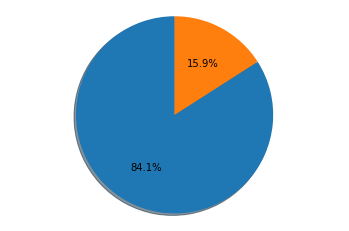

In [19]:
 fig1, ax1 = plt.subplots()
ax1.pie(data[cat_cols[1]].value_counts(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  

plt.show()

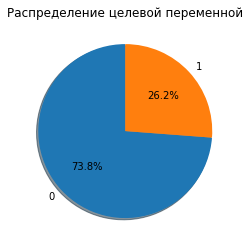

In [20]:
labels = data[target_col].unique()
sizes = [np.sum(data[target_col] == labels[j]) for j in range(len(labels))]

plt.title('Распределение целевой переменной')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [21]:
# Как видно, классы не являются не сбалансированными

In [22]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [23]:
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis=1)
y = data[target_col]

In [24]:
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,HasPhoneService_No,HasPhoneService_Yes,HasMultiplePhoneNumbers_No,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_DSL,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No,HasOnlineSecurityService_No internet service,HasOnlineSecurityService_Yes,HasOnlineBackup_No,HasOnlineBackup_No internet service,HasOnlineBackup_Yes,HasDeviceProtection_No,HasDeviceProtection_No internet service,HasDeviceProtection_Yes,HasTechSupportAccess_No,HasTechSupportAccess_No internet service,HasTechSupportAccess_Yes,HasOnlineTV_No,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
5278,50,44.45,2188.45,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0
5279,1,55.05,55.05,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1
5280,29,76.00,2215.25,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [25]:
X_train, X_valid, y_train, y_valid = train_test_split(X.values, y.values, 
                                                    train_size=0.8,
                                                    random_state=42)

In [27]:
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [37]:
clf = LogisticRegressionCV( cv=5, scoring='roc_auc', refit=True, random_state=42).fit(X_train, y_train)
clf.score(X_valid, y_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.8150922137771169

In [38]:
clf.get_params
# C = 10, score ~ 0.815

<bound method BaseEstimator.get_params of LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=42, refit=True,
                     scoring='roc_auc', solver='lbfgs', tol=0.0001, verbose=0)>

In [40]:
!pip install catboost

     |████████████████████████████████| 67.3MB 59kB/s 


In [41]:
import catboost

In [46]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(data.iloc[:, :-1], y.values, 
                                                       train_size=0.8, 
                                                       random_state=42)

In [47]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, 
                                             cat_features=cat_cols)

boosting_model.fit(X_train_origin, y_train)

y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.083391
0:	learn: 0.6382749	total: 15.2ms	remaining: 3.02s
1:	learn: 0.5970973	total: 28.2ms	remaining: 2.79s
2:	learn: 0.5610080	total: 42.2ms	remaining: 2.77s
3:	learn: 0.5329491	total: 55.8ms	remaining: 2.73s
4:	learn: 0.5112068	total: 71.5ms	remaining: 2.79s
5:	learn: 0.4930985	total: 88.9ms	remaining: 2.87s
6:	learn: 0.4800850	total: 100ms	remaining: 2.76s
7:	learn: 0.4681540	total: 115ms	remaining: 2.77s
8:	learn: 0.4583285	total: 131ms	remaining: 2.79s
9:	learn: 0.4494858	total: 148ms	remaining: 2.81s
10:	learn: 0.4439489	total: 160ms	remaining: 2.75s
11:	learn: 0.4371125	total: 175ms	remaining: 2.74s
12:	learn: 0.4311122	total: 191ms	remaining: 2.75s
13:	learn: 0.4264039	total: 209ms	remaining: 2.78s
14:	learn: 0.4222915	total: 227ms	remaining: 2.8s
15:	learn: 0.4190003	total: 242ms	remaining: 2.78s
16:	learn: 0.4153313	total: 256ms	remaining: 2.75s
17:	learn: 0.4132986	total: 267ms	remaining: 2.7s
18:	learn: 0.4116653	total: 279ms	remaining: 2.66s
19:	lea

In [53]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(train_auc, test_auc)

0.8938600086850297 0.8228013224850159


In [61]:
boosting_model2 = catboost.CatBoostClassifier(n_estimators=1000,learning_rate = 0.01, 
                                             cat_features=cat_cols)

boosting_model2.fit(X_train_origin, y_train)

y_train_predicted2 = boosting_model2.predict_proba(X_train_origin)[:, 1]
y_test_predicted2 = boosting_model2.predict_proba(X_test_origin)[:, 1]

0:	learn: 0.6860991	total: 14.5ms	remaining: 14.5s
1:	learn: 0.6795863	total: 31.2ms	remaining: 15.6s
2:	learn: 0.6726474	total: 45.6ms	remaining: 15.2s
3:	learn: 0.6659844	total: 58.6ms	remaining: 14.6s
4:	learn: 0.6596041	total: 74.3ms	remaining: 14.8s
5:	learn: 0.6540234	total: 88ms	remaining: 14.6s
6:	learn: 0.6478283	total: 110ms	remaining: 15.7s
7:	learn: 0.6421872	total: 123ms	remaining: 15.3s
8:	learn: 0.6386669	total: 128ms	remaining: 14.1s
9:	learn: 0.6328955	total: 141ms	remaining: 14s
10:	learn: 0.6274851	total: 156ms	remaining: 14s
11:	learn: 0.6223386	total: 169ms	remaining: 13.9s
12:	learn: 0.6174567	total: 181ms	remaining: 13.8s
13:	learn: 0.6126691	total: 195ms	remaining: 13.7s
14:	learn: 0.6081700	total: 207ms	remaining: 13.6s
15:	learn: 0.6030060	total: 224ms	remaining: 13.8s
16:	learn: 0.5981841	total: 237ms	remaining: 13.7s
17:	learn: 0.5934643	total: 254ms	remaining: 13.9s
18:	learn: 0.5891942	total: 268ms	remaining: 13.8s
19:	learn: 0.5851111	total: 276ms	remaini

In [62]:
train_auc2 = roc_auc_score(y_train, y_train_predicted2)
test_auc2 = roc_auc_score(y_test, y_test_predicted2)
print(train_auc2, test_auc2)

0.8781505698898485 0.8314847480167342


In [64]:
boosting_model3 = catboost.CatBoostClassifier(n_estimators=1000, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)}, 
                           X_train_origin, 
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8368486888
bestIteration = 270

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8368487	best: 0.8368487 (0)	total: 14.8s	remaining: 4m 41s

bestTest = 0.8410793363
bestIteration = 409

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8410793	best: 0.8410793 (1)	total: 29.8s	remaining: 4m 27s

bestTest = 0.8389981597
bestIteration = 354

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8389982	best: 0.8410793 (1)	total: 43.9s	remaining: 4m 8s

bestTest = 0.8399075512
bestIteration = 398

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8399076	best: 0.8410793 (1)	total: 58.5s	remaining: 3m 53s



{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [83]:
boosting_model5 = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_model5.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20),
                            'max_depth': np.arange(1,17)}, 
                           X_train_origin, 
                           y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8294297792
bestIteration = 191

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8294298	best: 0.8294298 (0)	total: 660ms	remaining: 3m 30s

bestTest = 0.8346992179
bestIteration = 198

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8346992	best: 0.8346992 (1)	total: 1.2s	remaining: 3m 11s

bestTest = 0.8315001725
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8315002	best: 0.8346992 (1)	total: 1.71s	remaining: 3m 1s

bestTest = 0.8311730791
bestIteration = 199

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8311731	best: 0.8346992 (1)	total: 2.26s	remaining: 2m 58s

b

KeyboardInterrupt: ignored

In [92]:
boosting_model0 = catboost.CatBoostClassifier(n_estimators=200 ,learning_rate=0.03 ,
                                              silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC',
                                              l2_leaf_reg=0.06)

boosting_model0.fit(X_train_origin, y_train)

y_train_predicted0 = boosting_model0.predict_proba(X_train_origin)[:, 1]
y_test_predicted0 = boosting_model0.predict_proba(X_test_origin)[:, 1]

train_auc0 = roc_auc_score(y_train, y_train_predicted0)
test_auc0 = roc_auc_score(y_test, y_test_predicted0)
print(train_auc0, test_auc0)

0.8739902493438397 0.8295799817142435


In [93]:
boosting_mode1 = catboost.CatBoostClassifier(silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')
boosting_mode1.grid_search({'l2_leaf_reg': np.linspace(0, 1, 5),
                            'max_depth': np.arange(1,7),
                            'learning_rate':np.linspace(0.001,0.1,5),
                            'n_estimators':np.linspace(50,200,3)}, 
                           X_train_origin, 
                           y_train, plot=True)

# loss: 0.8375496	best: 0.8444689 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.7267260467
bestIteration = 42

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.7267260	best: 0.7267260 (0)	total: 295ms	remaining: 2m 12s

bestTest = 0.8055196112
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8055196	best: 0.8055196 (1)	total: 438ms	remaining: 1m 38s

bestTest = 0.8220935415
bestIteration = 48

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8220935	best: 0.8220935 (2)	total: 597ms	remaining: 1m 28s

bestTest = 0.8224565793
bestIteration = 49

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8224566	best: 0.8224566 (3)	total: 732ms	remaining: 1m 21s

bes

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [126]:
boosting_mode1 = catboost.CatBoostClassifier(depth= 4,
                                            iterations= 200.0,
                                            l2_leaf_reg=0.75,
                                            learning_rate= 0.07525000000000001,
                                             silent=True,
                                             cat_features=cat_cols,
                                             eval_metric='AUC')


In [97]:
best_model = boosting_mode1

In [124]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
#|submission['Id']= np.arange(0, len(submission))
#submission['Churn'] =  best_model.predict_proba(X_test)[:,1] 
submission = pd.DataFrame(data = best_model.predict_proba(X_test)[:,1] )
submission.to_csv('./my_submission.csv')

In [125]:
submission.head

<bound method NDFrame.head of              0
0     0.044200
1     0.735428
2     0.647305
3     0.016984
4     0.001208
...        ...
1756  0.061847
1757  0.012515
1758  0.815262
1759  0.580223
1760  0.003833

[1761 rows x 1 columns]>

In [122]:
aa.head

<bound method NDFrame.head of       Unnamed: 0    Id     Churn
0              0     0  0.044200
1              1     1  0.735428
2              2     2  0.647305
3              3     3  0.016984
4              4     4  0.001208
...          ...   ...       ...
1756        1756  1756  0.061847
1757        1757  1757  0.012515
1758        1758  1758  0.815262
1759        1759  1759  0.580223
1760        1760  1760  0.003833

[1761 rows x 3 columns]>